In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datasets import Dataset, DatasetDict
import warnings
warnings.filterwarnings('ignore')

# Set plotting style and fonts
sns.set_style('whitegrid')
# Increase font sizes for readability
sns.set_context('notebook', font_scale=1.4)
plt.rcParams.update({
    'figure.figsize': (18, 8),
    'font.size': 32,
    'axes.titlesize': 28,
    'axes.labelsize': 25,
    'xtick.labelsize': 23,
    'ytick.labelsize': 23,
    'legend.fontsize': 21
})

In [2]:
base_dir = Path("../data/evaluation_results")
datasets = ['ft', 'musiccaps', 'lp-musiccaps', 'zero_shot', 'base']

In [3]:
predictions = {}

for d in datasets:
    print(d)
    # model_dir = base_dir / f"{d}_per_sample_scores.csv"
    model_dir = base_dir / f"{d}.csv"
    model_predictions = pd.read_csv(model_dir)
    predictions[d] = pd.DataFrame(model_predictions).head(500)
display(predictions['ft'].head())

ft
musiccaps
lp-musiccaps
zero_shot
base


,id,aspect_list,prediction,filename,clap_score,fad_score
0,cb2cb697bc5bea9d0daf0e36e69d1c32,"['acoustic drums', 'female singer', 'inspiring...",This uplifting track features a medium-paced a...,cb2cb697bc5bea9d0daf0e36e69d1c32.wav,0.551458,1.017647
1,718b25e382eab658978ba85233139769,"['slow tempo', 'soothing', 'trumpets']",This melancholic piece unfolds at a contemplat...,718b25e382eab658978ba85233139769.wav,0.261688,1.500049
2,1a02eb08a3ef4478f3a8f6fdb5910c57,"['drums', 'flat male vocal', 'fun', 'groovy ba...",This upbeat track features a driving punchy ki...,1a02eb08a3ef4478f3a8f6fdb5910c57.wav,0.547191,1.132070
3,b05607cf8dfb21a45c370b1836699729,"['digital drums', 'medium tempo', 'spiritual']",This mid-tempo track unfolds on a foundation o...,b05607cf8dfb21a45c370b1836699729.wav,0.580132,1.079273
4,594a9d268c2c738ebea298e72ad6efcf,"['folk', 'fun', 'male vocalist', 'soft']",A gentle acoustic guitar accompaniment sets th...,594a9d268c2c738ebea298e72ad6efcf.wav,0.503851,0.925707


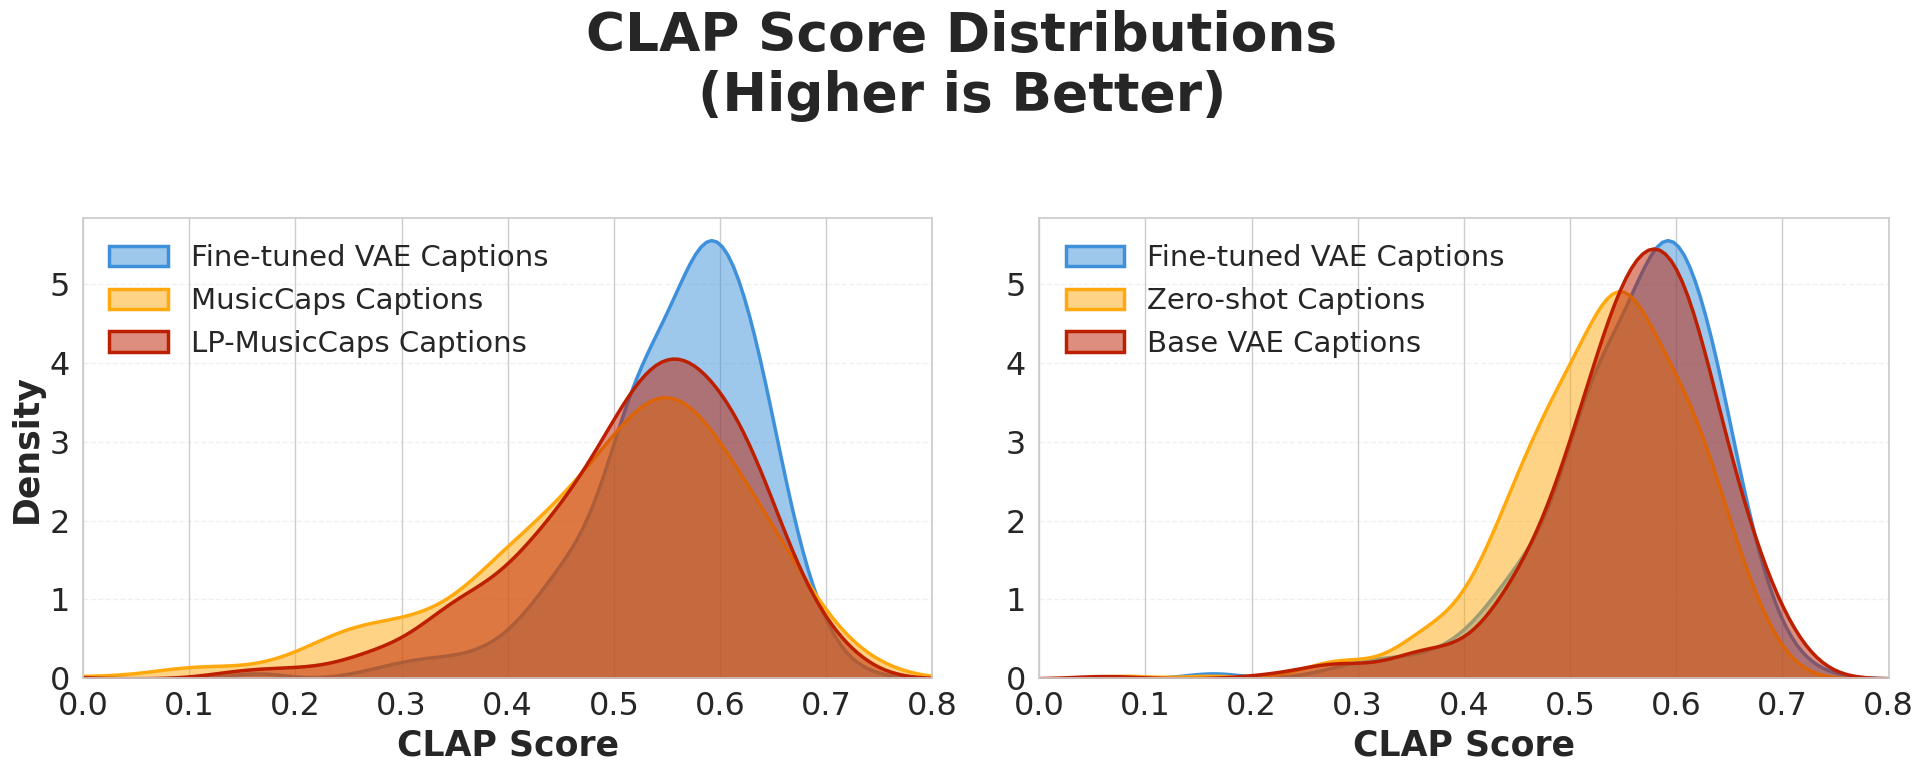

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Left subplot: Dataset comparison
datasets_left = ['ft', 'musiccaps', 'lp-musiccaps']
labels_left = ['Fine-tuned VAE Captions', 'MusicCaps Captions', 'LP-MusicCaps Captions']

for m, label in zip(datasets_left, labels_left):
    sns.kdeplot(predictions[m]['clap_score'], label=label, fill=True, alpha=0.5, 
                ax=ax1, linewidth=2.5)

ax1.set_xlabel('CLAP Score', fontweight='bold')
ax1.set_ylabel('Density', fontweight='bold')
ax1.set_xlim(0.0, 0.8)
ax1.legend(loc='upper left', framealpha=0.0)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Right subplot: Model comparison
datasets_right = ['ft', 'zero_shot', 'base']
labels_right = ['Fine-tuned VAE Captions', 'Zero-shot Captions', 'Base VAE Captions']

for m, label in zip(datasets_right, labels_right):
    sns.kdeplot(predictions[m]['clap_score'], label=label, fill=True, alpha=0.5, 
                ax=ax2, linewidth=2.5)

ax2.set_xlabel('CLAP Score', fontweight='bold')
ax2.set_ylabel('')
ax2.set_xlim(0.0, 0.8)
ax2.legend(loc='upper left', framealpha=0.0)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Overall title
fig.suptitle('CLAP Score Distributions\n(Higher is Better)', 
             fontweight='bold', y=1.00)

plt.tight_layout()
plt.style.use('petroff10')
plt.savefig("../docs/assets/clap_score_distribution_comparison.pdf", bbox_inches='tight')
plt.show()

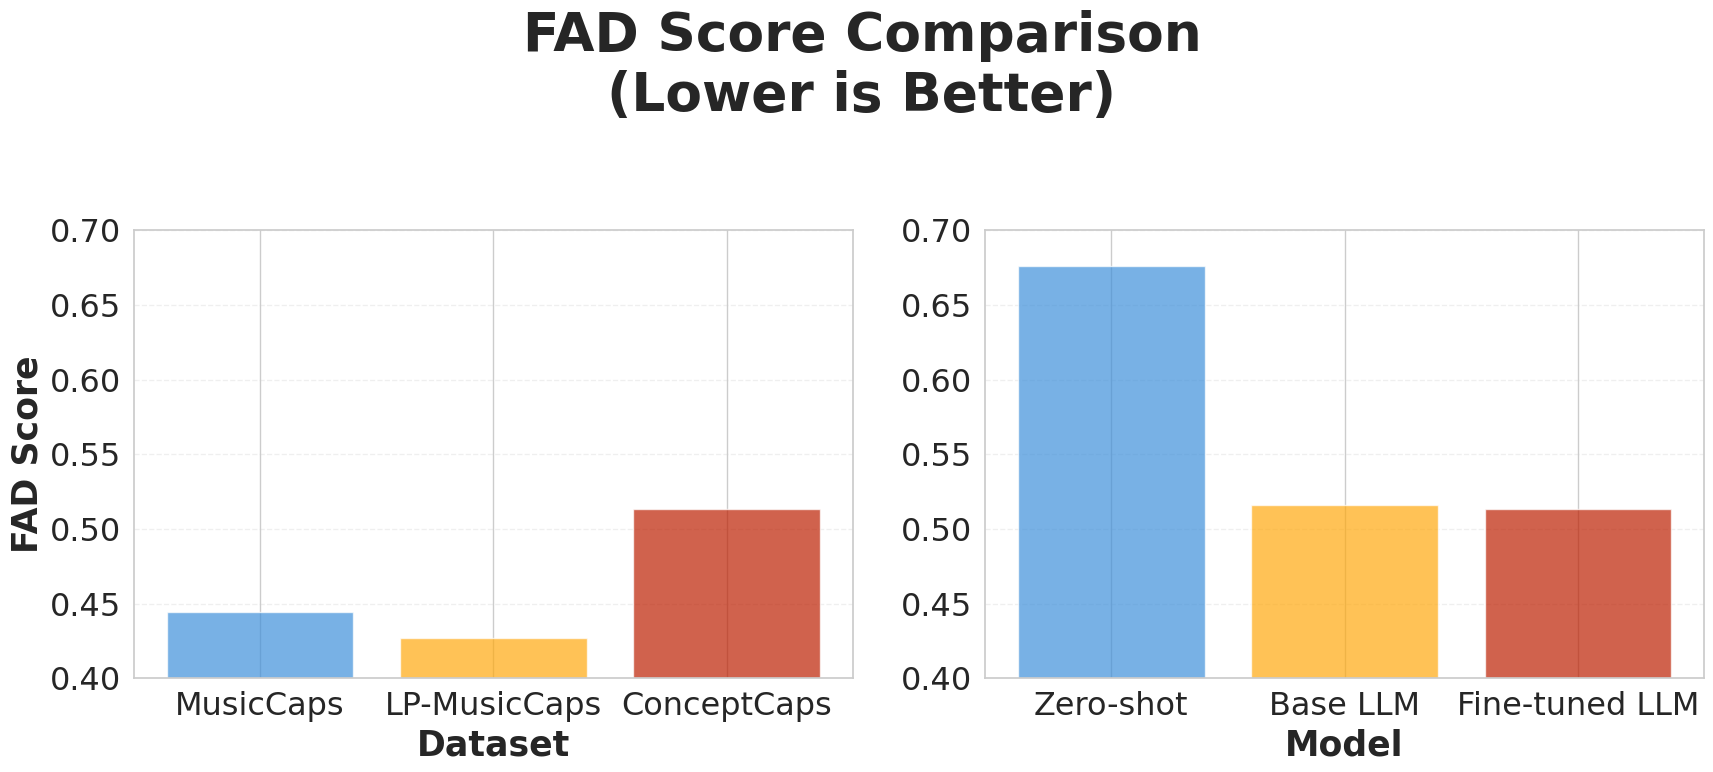

In [10]:
data = {
    'lp-musiccaps': 0.4272,
    'musiccaps': 0.4442,
    'base': 0.5163,
    'zero_shot': 0.6758,
    'ft': 0.5135
}

fig, (ax1, ax2) = plt.subplots(1, 2)

# Left subplot: Dataset comparison
datasets_left = ['musiccaps', 'lp-musiccaps', 'ft']
labels_left = ['MusicCaps', 'LP-MusicCaps', 'ConceptCaps']

for m, label in zip(datasets_left, labels_left):
    ax1.bar(label, data[m], alpha=0.7)
ax1.set_xlabel('Dataset', fontweight='bold')
ax1.set_ylabel('FAD Score', fontweight='bold')
ax1.set_ylim(0.4, 0.7)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Right subplot: Model comparison
datasets_right = ['zero_shot', 'base', 'ft']
labels_right = ['Zero-shot', 'Base LLM', 'Fine-tuned LLM']

for m, label in zip(datasets_right, labels_right):
    ax2.bar(label, data[m], alpha=0.7)
ax2.set_xlabel('Model', fontweight='bold')
ax2.set_ylim(0.4, 0.7)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Overall title
fig.suptitle('FAD Score Comparison\n(Lower is Better)', 
             fontweight='bold', y=1.00)

plt.style.use('petroff10')
plt.tight_layout()
plt.savefig("../docs/assets/fad_score_comparison.pdf", bbox_inches='tight')
plt.show()